In [1]:
from wmse_sequence import WMSESequencialModel, WMSESequencialModelBuilder

import numpy as np
import matplotlib.pyplot as plot

### Single hairpin structure

In [2]:
models = []
total_size = 15
head_size = 2
for hairpin_size in range(10):
    model = WMSESequencialModel(
        WMSESequencialModelBuilder(entropy_loss = 3.0)   
            .add_pike(total_size + head_size)
            .add_pike(total_size + head_size)
            .add_connection(1, head_size, hairpin_size, 1.0, 3.0, 1)
    )
    models.append(model)

In [3]:
temperatures = np.arange(0.03, 0.30, 0.001)

In [4]:
melting_curves = [map(lambda t: models[i].get_link_probability(t)[1], temperatures) for i in range(10)]

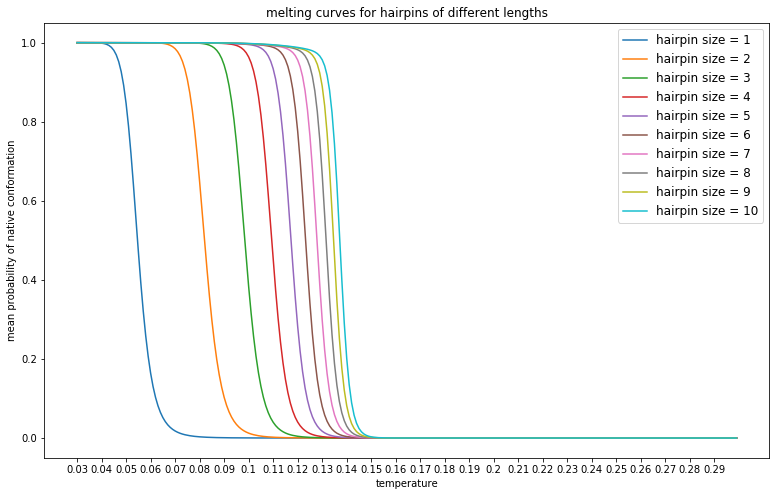

In [5]:
plot.figure(figsize=(13, 8))
for i, mc in enumerate(melting_curves):
    plot.plot(mc, label='hairpin size = %d'%(i + 1))
    
plot.title('melting curves for hairpins of different lengths')   
plot.legend(fontsize='large')
plot.xlabel('temperature')
plot.ylabel('mean probability of native conformation')
plot.xticks(range(0, len(temperatures), 10), np.round(temperatures[::10], decimals=2))
plot.show()

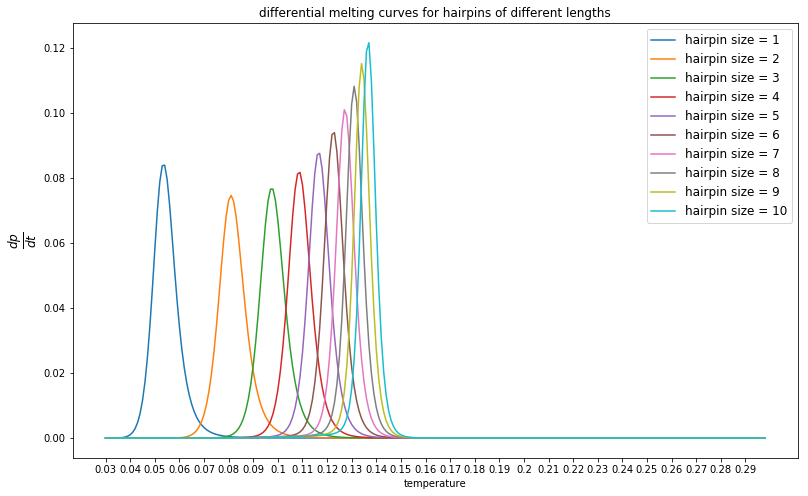

In [6]:
plot.figure(figsize=(13, 8))
for i, mc in enumerate(melting_curves):
    diff = np.diff(mc)
    plot.plot(-diff, label='hairpin size = %d'%(i + 1))
plot.title('differential melting curves for hairpins of different lengths')   
plot.legend(fontsize='large')
plot.xlabel('temperature')
plot.ylabel('$\\frac{dp}{dt}$', fontsize='xx-large')
plot.xticks(range(0, len(temperatures), 10), np.round(temperatures[::10], decimals=2))
plot.show()

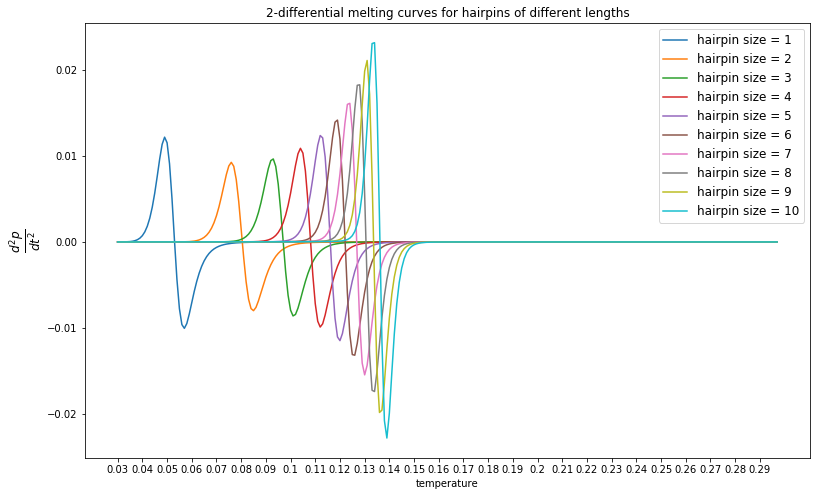

In [7]:
plot.figure(figsize=(13, 8))
for i, mc in enumerate(melting_curves):
    diff = np.diff(np.diff(mc))
    plot.plot(-diff, label='hairpin size = %d'%(i + 1))
plot.title('2-differential melting curves for hairpins of different lengths')   
plot.legend(fontsize='large')
plot.xlabel('temperature')
plot.ylabel('$\\frac{d^2p}{dt^2}$', fontsize='xx-large')
plot.xticks(range(0, len(temperatures), 10), np.round(temperatures[::10], decimals=2))
plot.show()